# Plot Comparison Between Algorithms

In [1]:
%matplotlib notebook

import os
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2

We need to read the CSV files (from a function in another file) to get the reward at each timestep for each run of each algorithm. Only the `algorithmsToPlot` will be loaded.

In [4]:
algorithmsToPlot = ['dqn', 'example']
basepath = '../data/'

rewardsData = {}

from load import load_data

for alg in os.listdir(basepath):
    if alg in algorithmsToPlot:
        rewardsData[alg] = load_data(basepath+alg)

print(rewardsData)
print('Data will be plotted for', ','.join([k for k in rewardsData.keys()]))
print('Loaded all the rewards from the csv files')

0 ../data/example
0 ../data/dqn
{'example': array([0., 0., 0., ..., 0., 0., 0.]), 'dqn': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])}
Data will be plotted for example,dqn
Loaded all the rewards from the csv files


The rewards can be transformed into the following values of transformation =
1. 'Returns'
2. 'Failures'
3. 'Average-Rewards'
4. 'Rewards' (no change)

----------------------------------------------------------------------------------------------

There is an additional parameter of window which can be any non-negative integer. It is used for the 'Average-Rewards' transformation to maintain a moving average over a sliding window. By default window is 0.

- If window is 500 and timesteps are 10000, then the first element is the average of the performances of timesteps from 1 - 500. The second element is the average of the performances of timesteps from 2 - 501. The last element is the average of the performances of timesteps from 9501 - 10000.

In [5]:
transformedData = {}

from load import transform_data

transformation = 'Returns'
window = 500

for alg, data in rewardsData.items():
    transformedData[alg] = transform_data(alg, data, transformation, window)

print(transformedData)
print('Data will be plotted for', ','.join([k for k in transformedData.keys()]))
print('All the stored rewards are transformed to: ', transformation)

0 example
10 example
20 example
30 example
40 example
50 example
60 example
70 example
80 example
90 example
100 example
110 example
120 example
130 example
140 example
150 example
160 example
170 example
180 example
190 example
200 example
210 example
220 example
230 example
240 example
250 example
260 example
270 example
280 example
290 example
300 example
310 example
320 example
330 example
340 example
350 example
360 example
370 example
380 example
390 example
400 example
410 example
420 example
430 example
440 example
450 example
460 example
470 example
480 example
490 example
500 example
510 example
520 example
530 example
540 example
550 example
560 example
570 example
580 example
590 example
600 example
610 example
620 example
630 example
640 example
650 example
660 example
670 example
680 example
690 example
700 example
710 example
720 example
730 example
740 example
750 example
760 example
770 example
780 example
790 example
800 example
810 example
820 example
830 example
840

7170 example
7180 example
7190 example
7200 example
7210 example
7220 example
7230 example
7240 example
7250 example
7260 example
7270 example
7280 example
7290 example
7300 example
7310 example
7320 example
7330 example
7340 example
7350 example
7360 example
7370 example
7380 example
7390 example
7400 example
7410 example
7420 example
7430 example
7440 example
7450 example
7460 example
7470 example
7480 example
7490 example
7500 example
7510 example
7520 example
7530 example
7540 example
7550 example
7560 example
7570 example
7580 example
7590 example
7600 example
7610 example
7620 example
7630 example
7640 example
7650 example
7660 example
7670 example
7680 example
7690 example
7700 example
7710 example
7720 example
7730 example
7740 example
7750 example
7760 example
7770 example
7780 example
7790 example
7800 example
7810 example
7820 example
7830 example
7840 example
7850 example
7860 example
7870 example
7880 example
7890 example
7900 example
7910 example
7920 example
7930 example

14730 example
14740 example
14750 example
14760 example
14770 example
14780 example
14790 example
14800 example
14810 example
14820 example
14830 example
14840 example
14850 example
14860 example
14870 example
14880 example
14890 example
14900 example
14910 example
14920 example
14930 example
14940 example
14950 example
14960 example
14970 example
14980 example
14990 example
15000 example
15010 example
15020 example
15030 example
15040 example
15050 example
15060 example
15070 example
15080 example
15090 example
15100 example
15110 example
15120 example
15130 example
15140 example
15150 example
15160 example
15170 example
15180 example
15190 example
15200 example
15210 example
15220 example
15230 example
15240 example
15250 example
15260 example
15270 example
15280 example
15290 example
15300 example
15310 example
15320 example
15330 example
15340 example
15350 example
15360 example
15370 example
15380 example
15390 example
15400 example
15410 example
15420 example
15430 example
15440 

21000 example
21010 example
21020 example
21030 example
21040 example
21050 example
21060 example
21070 example
21080 example
21090 example
21100 example
21110 example
21120 example
21130 example
21140 example
21150 example
21160 example
21170 example
21180 example
21190 example
21200 example
21210 example
21220 example
21230 example
21240 example
21250 example
21260 example
21270 example
21280 example
21290 example
21300 example
21310 example
21320 example
21330 example
21340 example
21350 example
21360 example
21370 example
21380 example
21390 example
21400 example
21410 example
21420 example
21430 example
21440 example
21450 example
21460 example
21470 example
21480 example
21490 example
21500 example
21510 example
21520 example
21530 example
21540 example
21550 example
21560 example
21570 example
21580 example
21590 example
21600 example
21610 example
21620 example
21630 example
21640 example
21650 example
21660 example
21670 example
21680 example
21690 example
21700 example
21710 

27340 example
27350 example
27360 example
27370 example
27380 example
27390 example
27400 example
27410 example
27420 example
27430 example
27440 example
27450 example
27460 example
27470 example
27480 example
27490 example
27500 example
27510 example
27520 example
27530 example
27540 example
27550 example
27560 example
27570 example
27580 example
27590 example
27600 example
27610 example
27620 example
27630 example
27640 example
27650 example
27660 example
27670 example
27680 example
27690 example
27700 example
27710 example
27720 example
27730 example
27740 example
27750 example
27760 example
27770 example
27780 example
27790 example
27800 example
27810 example
27820 example
27830 example
27840 example
27850 example
27860 example
27870 example
27880 example
27890 example
27900 example
27910 example
27920 example
27930 example
27940 example
27950 example
27960 example
27970 example
27980 example
27990 example
28000 example
28010 example
28020 example
28030 example
28040 example
28050 

37170 example
37180 example
37190 example
37200 example
37210 example
37220 example
37230 example
37240 example
37250 example
37260 example
37270 example
37280 example
37290 example
37300 example
37310 example
37320 example
37330 example
37340 example
37350 example
37360 example
37370 example
37380 example
37390 example
37400 example
37410 example
37420 example
37430 example
37440 example
37450 example
37460 example
37470 example
37480 example
37490 example
37500 example
37510 example
37520 example
37530 example
37540 example
37550 example
37560 example
37570 example
37580 example
37590 example
37600 example
37610 example
37620 example
37630 example
37640 example
37650 example
37660 example
37670 example
37680 example
37690 example
37700 example
37710 example
37720 example
37730 example
37740 example
37750 example
37760 example
37770 example
37780 example
37790 example
37800 example
37810 example
37820 example
37830 example
37840 example
37850 example
37860 example
37870 example
37880 

43350 example
43360 example
43370 example
43380 example
43390 example
43400 example
43410 example
43420 example
43430 example
43440 example
43450 example
43460 example
43470 example
43480 example
43490 example
43500 example
43510 example
43520 example
43530 example
43540 example
43550 example
43560 example
43570 example
43580 example
43590 example
43600 example
43610 example
43620 example
43630 example
43640 example
43650 example
43660 example
43670 example
43680 example
43690 example
43700 example
43710 example
43720 example
43730 example
43740 example
43750 example
43760 example
43770 example
43780 example
43790 example
43800 example
43810 example
43820 example
43830 example
43840 example
43850 example
43860 example
43870 example
43880 example
43890 example
43900 example
43910 example
43920 example
43930 example
43940 example
43950 example
43960 example
43970 example
43980 example
43990 example
44000 example
44010 example
44020 example
44030 example
44040 example
44050 example
44060 

49820 example
49830 example
49840 example
49850 example
49860 example
49870 example
49880 example
49890 example
49900 example
49910 example
49920 example
49930 example
49940 example
49950 example
49960 example
49970 example
49980 example
49990 example
0 dqn
{'example': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), 'dqn': array([[    0.,     0.,     0., ..., -2752., -2752., -2752.],
       [    0.,     0.,     0., ..., -2612., -2612., -2612.],
       [    0.,     0.,     0., ..., -1402., -1402., -1402.],
       [    0.,     0.,     0., ..., -1872., -1872., -1872.],
       [    0.,     0.,     0., ..., -2002., -2002., -2002.]])}
Data will be plotted for example,dqn
All the stored rewards are transformed to:  Returns


Here, we can plot the following statistics:

1. Mean of all the runs

2. Median run

3. Run with the best performance (highest return, or equivalently least failures)

4. Run with the worst performance (lowest return, or equivalently most failures)

5. Mean along with the confidence interval (Currently, plots the mean along with 95% confidence interval, but should be changed to make it adaptive to any confidence interval)

6. Mean along with percentile regions (Plots the mean and shades the region between the run with the lower percentile and the run with the upper percentile)

----------------------------------------------------------------------------------------------

Details:

plotBest, plotWorst, plotMeanAndPercentileRegions sort the performances based on their final performance

                                   ----------------------------------------------------

Mean, Median, MeanAndConfidenceInterval are all symmetric plots so 'Failures' does not affect their plots
    
Best, Worst, MeanAndPercentileRegions are all asymmetric plots so 'Failures' affects their plots, and has to be treated in the following way:   

                                   ----------------------------------------------------

1. plotBest for Returns will plot the run with the highest return (least failures)
   plotBest for Failures will plot the run with the least failures and not the highest failures

2. plotWorst for Returns will plot the run with the lowest return (most failures)
   plotWorst for Failures will plot the run with the most failures and not the least failures

3. plotMeanAndPercentileRegions for Returns uses the lower variable to select the run with the 'lower' percentile and uses the upper variable to select the run with the 'upper' percentile
   plotMeanAndPercentileRegions for Failures uses the lower variable along with some calculations to select the run with 'upper' percentile and uses the upper variable along with some calculations to select the run with the 'lower' percentile 
    
----------------------------------------------------------------------------------------------

Caution:
- Jupyter notebooks (mostly) or matplotlib gives an error when displaying very dense plots. For example: plotting best and worst case for transformation of 'Rewards' for 'example' algorithm, or when trying to zoom into dense plots. Most of the plots for 'Rewards' and 'example' fail.

In [6]:
from stats import getMean, getMedian, getBest, getWorst, getConfidenceIntervalOfMean, getRegion

# Add color, linestyles as needed

def plotMean(xAxis, data):
    mean = getMean(data)
    plt.plot(xAxis, mean, label=alg+'-mean')

def plotMedian(xAxis, data):
    median = getMedian(data)
    plt.plot(xAxis, median, label=alg+'-median')

def plotBest(xAxis, data, transformation):
    best = getBest(data, transformation)
    plt.plot(xAxis, best, label=alg+'-best')

def plotWorst(xAxis, data, transformation):
    worst = getWorst(data,  transformation)
    plt.plot(xAxis, worst, label=alg+'-worst')

def plotMeanAndConfidenceInterval(xAxis, data, confidence):
    plotMean(xAxis, data)
    lowerBound, upperBound = getConfidenceIntervalOfMean(data, confidence)
    plt.fill_between(xAxis, lowerBound, upperBound, alpha=0.25)

def plotMeanAndPercentileRegions(xAxis, data, lower, upper, transformation):
    plotMean(xAxis, data)
    lowerRun, upperRun = getRegion(data, lower, upper, transformation)
    plt.fill_between(xAxis, lowerRun, upperRun, alpha=0.25)

Details:

- X axis for 'Average-Rewards' will start from 'window' timesteps and end with the final timesteps

- Need to add color (shades), linestyle as per requirements

- Currently plot one at a time by commenting out the others otherwise, it displays different colors for all.


<IPython.core.display.Javascript object>


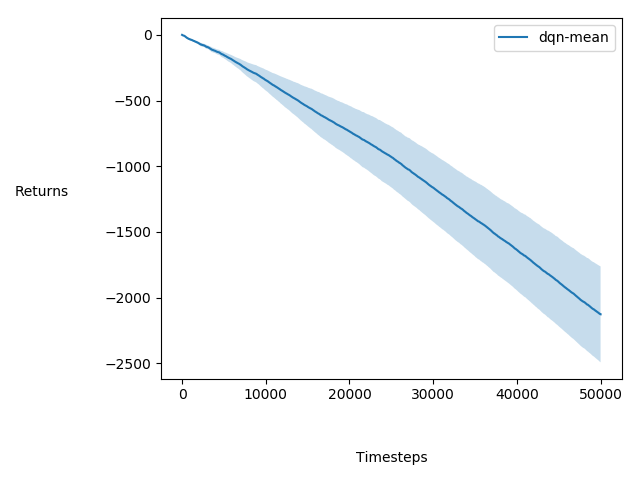

In [7]:
for alg, data in transformedData.items():
    
    if alg == 'example':
        continue
    
    lenRun = len(data[0])
    xAxis = np.array([i for i in range(1,lenRun+1)])

    
    if transformation == 'Average-Rewards':
        xAxis += (window-1)
    
    #plotMean(xAxis, data)
    
    #plotMedian(xAxis, data)
    
    #plotBest(xAxis, data, transformation=transformation)
    
    #plotWorst(xAxis, data, transformation=transformation)
    
    plotMeanAndConfidenceInterval(xAxis, data, confidence=0.9)
    
    #plotMeanAndPercentileRegions(xAxis, data, lower=0.5, upper=1.0, transformation=transformation)


plt.xlabel('Timesteps', labelpad=35)
plt.ylabel(transformation, rotation=0, labelpad=45)
plt.rcParams['figure.figsize'] = [8, 5.33]
plt.legend(loc=0)
plt.yticks()
plt.xticks()
plt.tight_layout()